# Construct Mesh

In [1]:
import os
import numpy as np
import open3d as o3d
from IPython.display import display, Markdown

In [2]:
from tinymesh import Mesh
from viewer import Viewer

## Load .PLY mesh with "Open3D"

In [3]:
models_dir = "../../data/models/"
filename = os.path.join(models_dir, "bunny.ply")
assert os.path.exists(filename), "file does not exist: %s" % filename

In [4]:
ply = o3d.io.read_triangle_mesh(filename)
verts = np.asarray(ply.vertices, dtype="float32")
faces = np.asarray(ply.triangles, dtype="uint32")
display(Markdown("**verts:** {:d}, **faces:** {:d}".format(len(verts), len(faces))))

**verts:** 35947, **faces:** 69451

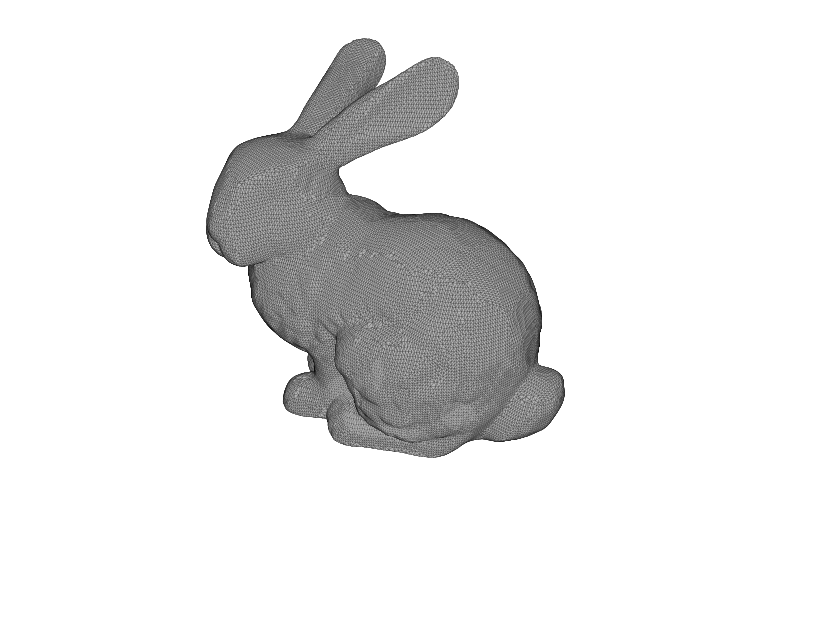

In [5]:
viewer = Viewer(800, 600)
viewer.lookat(2, 3, 4, 0, 0, 0, 0, 1, 0)
viewer.perspective(45, viewer.aspect, 1, 100)
viewer.visualization(verts, faces)

## Construct mesh with "tinymesh"

In [6]:
mesh = Mesh(verts, faces.reshape(-1))  # tinymesh uses flatten face indices
verts = mesh.get_vertices()
faces = mesh.get_vertex_indices()

In [7]:
verts = np.asarray(verts, dtype="float32")
faces = np.asarray(faces, dtype="uint32").reshape((-1, 3))

display(Markdown("### #verts, #faces are decreased by remove redudant vertices/faces!"))
display(Markdown("**verts:** {:d}, **faces:** {:d}".format(len(verts), len(faces))))

### #verts, #faces are decreased by remove redudant vertices/faces!

**verts:** 34834, **faces:** 69230

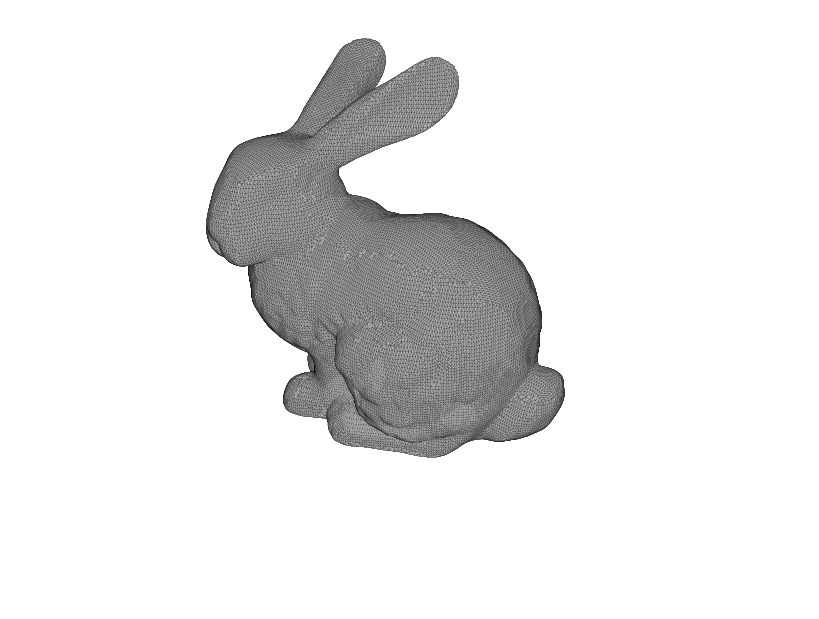

In [8]:
viewer.mesh_visualization(mesh)